In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [25]:
df = pd.read_csv('data/WaterQuality/water_potability.csv', encoding='utf-8')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [26]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [27]:
#df.drop(['ph', 'Sulfate'], axis=1, inplace=True)

In [14]:
df.dtypes

Hardness           float64
Solids             float64
Chloramines        float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [28]:
df.fillna(df.median(), inplace=True)

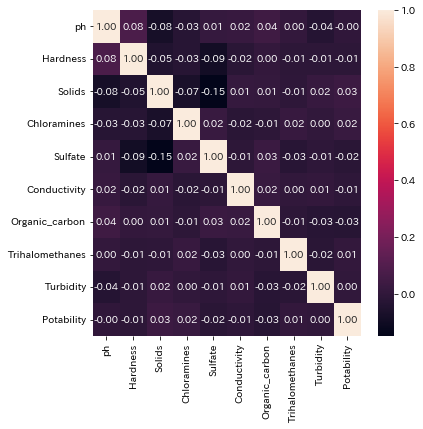

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

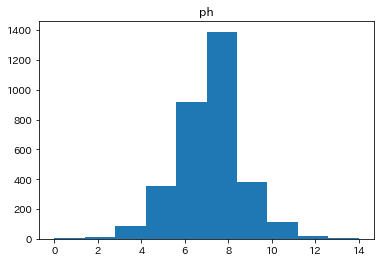

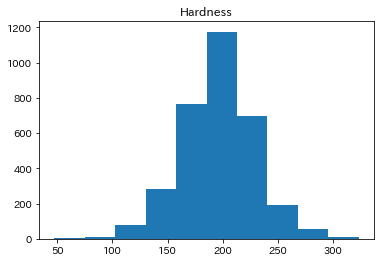

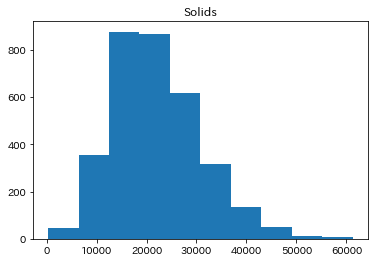

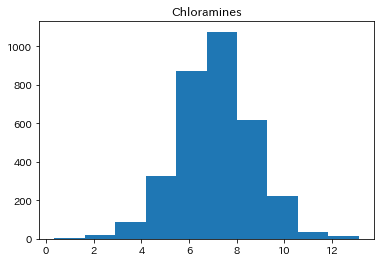

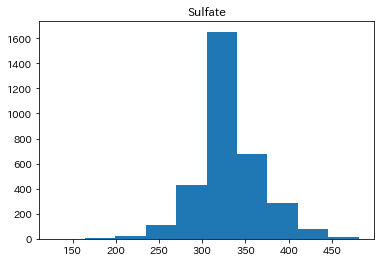

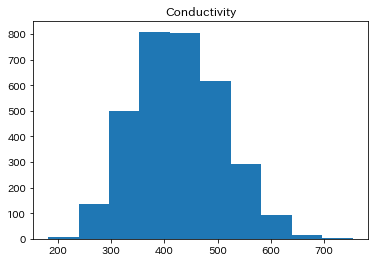

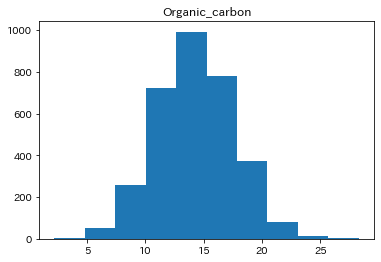

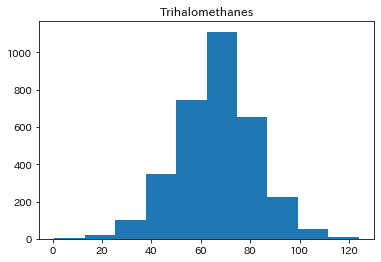

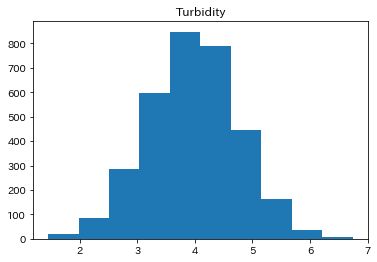

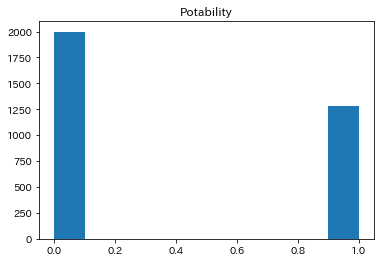

In [30]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [31]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(2620, 9)
(656, 9)


In [32]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [33]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.610305,1.000000,0.000978,0.001955,0.609756,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.717176,0.698727,0.483366,0.571429,0.538110,0.378238,0.285156,0.325167
2,SVC,0.609924,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000
3,GaussianNB,0.625573,0.549878,0.221135,0.315422,0.634146,0.565574,0.269531,0.365079
4,DecisionTreeClassifier,0.633588,0.942857,0.064579,0.120879,0.634146,0.863636,0.074219,0.136691
5,RandomForestClassifier,0.638168,0.930233,0.078278,0.144404,0.628049,0.833333,0.058594,0.109489
6,GradientBoostingClassifier,0.740458,0.878319,0.388454,0.538670,0.646341,0.601695,0.277344,0.379679


In [34]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [36]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.610687,1.000000,0.001957,0.003906,0.611280,1.000000,0.003906,0.007782
1,KNeighborsClassifier,0.761069,0.750000,0.581213,0.654906,0.646341,0.562500,0.421875,0.482143
2,SVC,0.730916,0.861048,0.369863,0.517454,0.678354,0.710280,0.296875,0.418733
3,GaussianNB,0.624427,0.545894,0.221135,0.314763,0.634146,0.566667,0.265625,0.361702
4,DecisionTreeClassifier,0.633588,0.942857,0.064579,0.120879,0.634146,0.863636,0.074219,0.136691
5,RandomForestClassifier,0.637405,0.900000,0.079256,0.145683,0.629573,0.842105,0.062500,0.116364
6,GradientBoostingClassifier,0.740458,0.878319,0.388454,0.538670,0.646341,0.601695,0.277344,0.379679


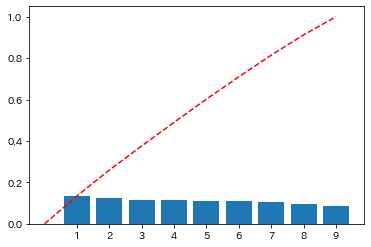

In [37]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [38]:
n = 8
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

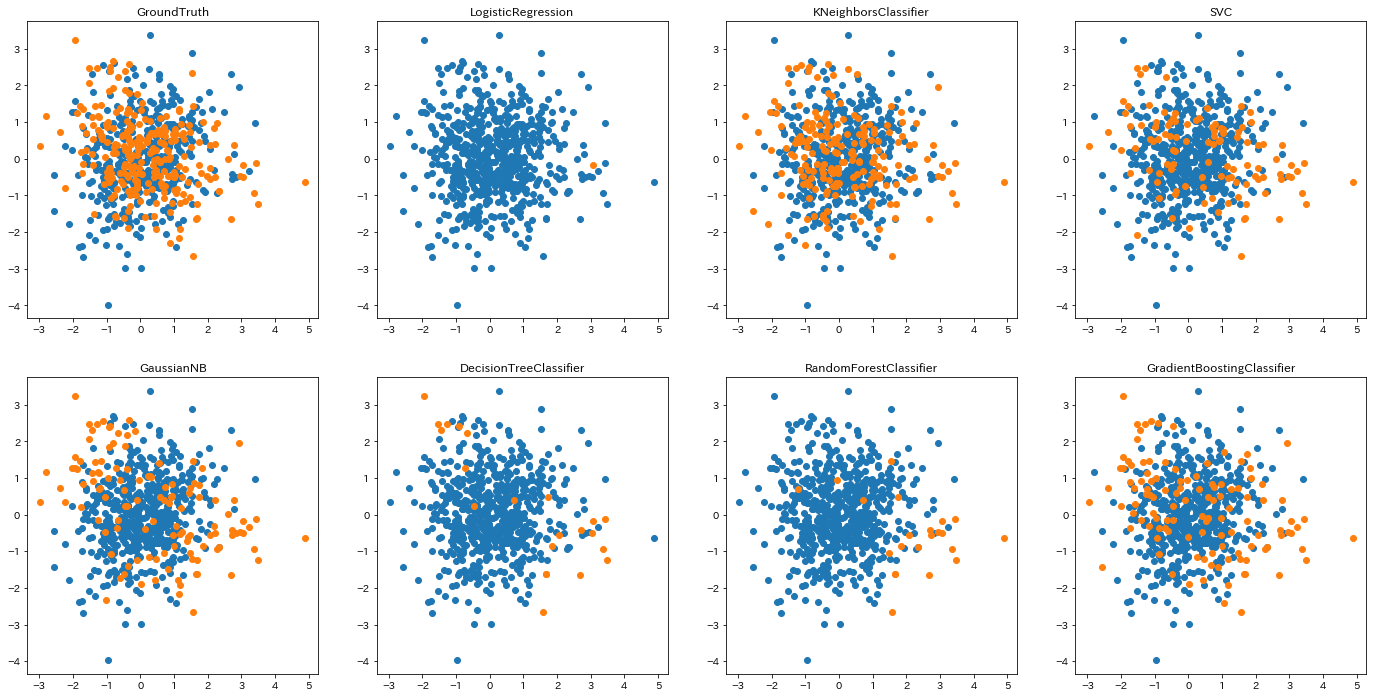

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.610687,1.000000,0.001957,0.003906,0.611280,1.000000,0.003906,0.007782
1,KNeighborsClassifier,0.761069,0.750000,0.581213,0.654906,0.646341,0.562500,0.421875,0.482143
2,SVC,0.730916,0.861048,0.369863,0.517454,0.678354,0.710280,0.296875,0.418733
3,GaussianNB,0.624427,0.545894,0.221135,0.314763,0.634146,0.566667,0.265625,0.361702
4,DecisionTreeClassifier,0.633588,0.942857,0.064579,0.120879,0.634146,0.863636,0.074219,0.136691
5,RandomForestClassifier,0.638931,0.941860,0.079256,0.146209,0.631098,0.818182,0.070312,0.129496
6,GradientBoostingClassifier,0.740458,0.878319,0.388454,0.538670,0.647866,0.606838,0.277344,0.380697


In [39]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp